In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./results//preprocessed_data.csv", index_col = 0)


In [4]:
# Data cleaning
display(df.sample(3))

,SHIPMENT_NUMBER,LAT,LON,RECORD_TIMESTAMP,PROJECT_ID,CARRIER_DISPLAY_ID,VEHICLE_SIZE,VEHICLE_BUILD_UP,FIRST_COLLECTION_POST_CODE,LAST_DELIVERY_POST_CODE,...,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_SCHEDULE_EARLIEST,FIRST_COLLECTION_SCHEDULE_LATEST,LAST_DELIVERY_SCHEDULE_EARLIEST,LAST_DELIVERY_SCHEDULE_LATEST,is_delayed,Distance_km,Step_Count,Ferry_Involved
191,SEZHUK-231004-249813,53.566629,-2.230436,2023-10-10 18:15:00+01:00,3244246f-e37c-4ba4-b9b3-61416a4449ae,CAUK000250,Tractor Unit,Box,S80 3FY,NAAS,...,53.207122,-6.742479,2023-10-10T04:00:00.000Z,2023-10-10T04:59:00.000Z,2023-10-12T08:25:00.000Z,2023-10-12 08:55:00+00:00,False,444.0919,100,True
542,SEZHUK-231016-253270,52.850776,-0.626627,2023-10-17 17:15:00+01:00,40415fe3-e446-4d1e-b141-3698b0dc47f3,CAUK000096,Tractor Unit,Curtain-Side 13.6M Trailer,IP24 1HP,NG7 2SD,...,52.934662,-1.181471,2023-10-17T09:00:00.000Z,2023-10-17T09:30:00.000Z,2023-10-17T13:30:00.000Z,2023-10-17 14:00:00+00:00,True,203.3255,36,False
2370,SEZHUK-231206-270263,51.499340,-2.700063,2023-12-12 18:57:00+00:00,192cd5b5-978c-4681-b206-2f4d04e081ec,CAUK000689,Tractor Unit,Curtain-Side 13.6M Trailer,DE14 2WT,CF11 8AQ,...,51.466832,-3.200826,2023-12-07T14:01:00.000Z,2023-12-08T09:00:00.000Z,2023-12-08T09:30:00.000Z,2023-12-08 10:00:00+00:00,True,229.5509,64,False


c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

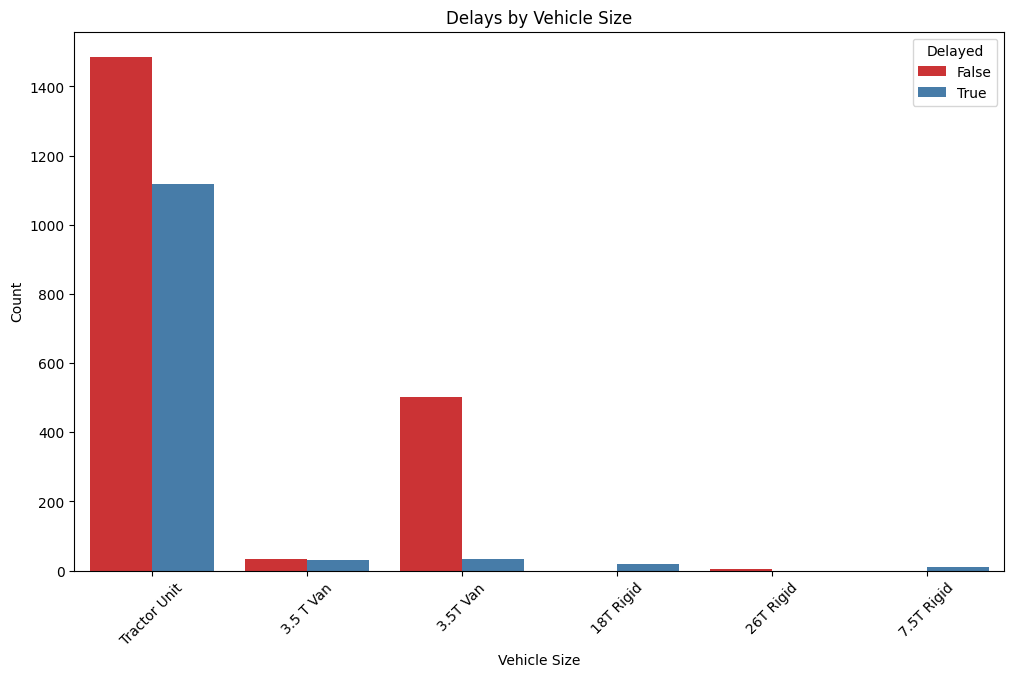

In [15]:
# Bar chart for delays by vehicle size
plt.figure(figsize=(12, 7))
sns.countplot(x='VEHICLE_SIZE', hue='is_delayed', data=df, palette='Set1')
plt.title('Delays by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Delayed')

plt.savefig('./results/Delays Vs Vehicle Size.jpeg')  # Saves the plot



plt.show()



In [14]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Calculate counts
count_data = df.groupby(['VEHICLE_SIZE', 'is_delayed']).size().unstack(fill_value=0)

# Calculate percentages
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Combine counts and percentages into one DataFrame for clearer presentation
table_data = pd.concat([count_data, percentage_data], axis=1, keys=['Counts', 'Percentages'])

# Reset index to make 'VEHICLE_SIZE' a column again, for better presentation
table_data.reset_index(inplace=True)
table_data


VEHICLE_SIZE Counts       Percentages            
is_delayed                False  True       False        True
0              18T Rigid      0    20    0.000000  100.000000
1              26T Rigid      4     0  100.000000    0.000000
2              3.5 T Van     33    30   52.380952   47.619048
3               3.5T Van    502    33   93.831776    6.168224
4             7.5T Rigid      0    11    0.000000  100.000000
5           Tractor Unit   1484  1118   57.033051   42.966949

c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


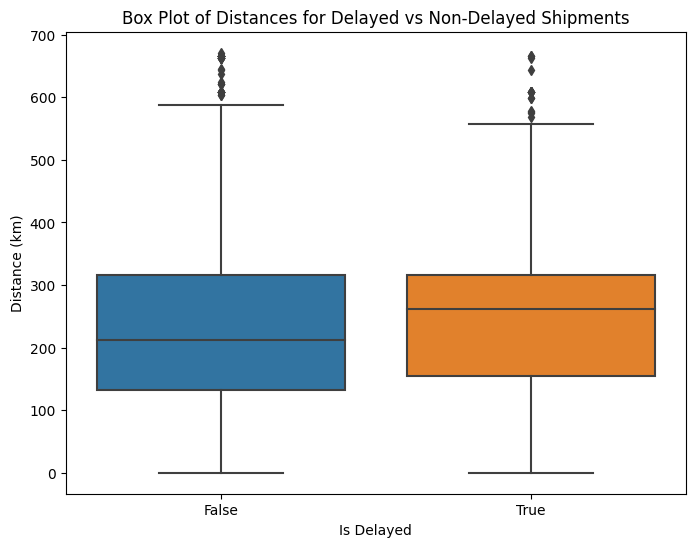

In [18]:
# Box plot for distribution of distances in delayed vs non-delayed shipments
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_delayed', y='Distance_km', data=df)
plt.title('Box Plot of Distances for Delayed vs Non-Delayed Shipments')
plt.xlabel('Is Delayed')
plt.ylabel('Distance (km)')

plt.savefig('./results/Distance Vs delay.jpeg')  # Saves the plot
plt.show()

c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

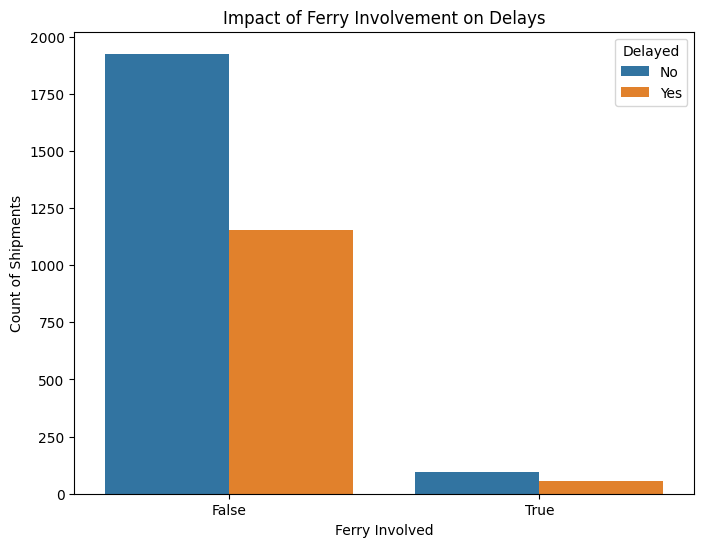

In [17]:
# Bar chart for Ferry Involvement
plt.figure(figsize=(8, 6))
sns.countplot(x='Ferry_Involved', hue='is_delayed', data=df)
plt.title('Impact of Ferry Involvement on Delays')
plt.xlabel('Ferry Involved')
plt.ylabel('Count of Shipments')
plt.legend(title='Delayed', labels=['No', 'Yes'])

plt.savefig('./results/Is_Ferry_onvolved Vs delay.jpeg')  # Saves the plot


plt.show()

c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


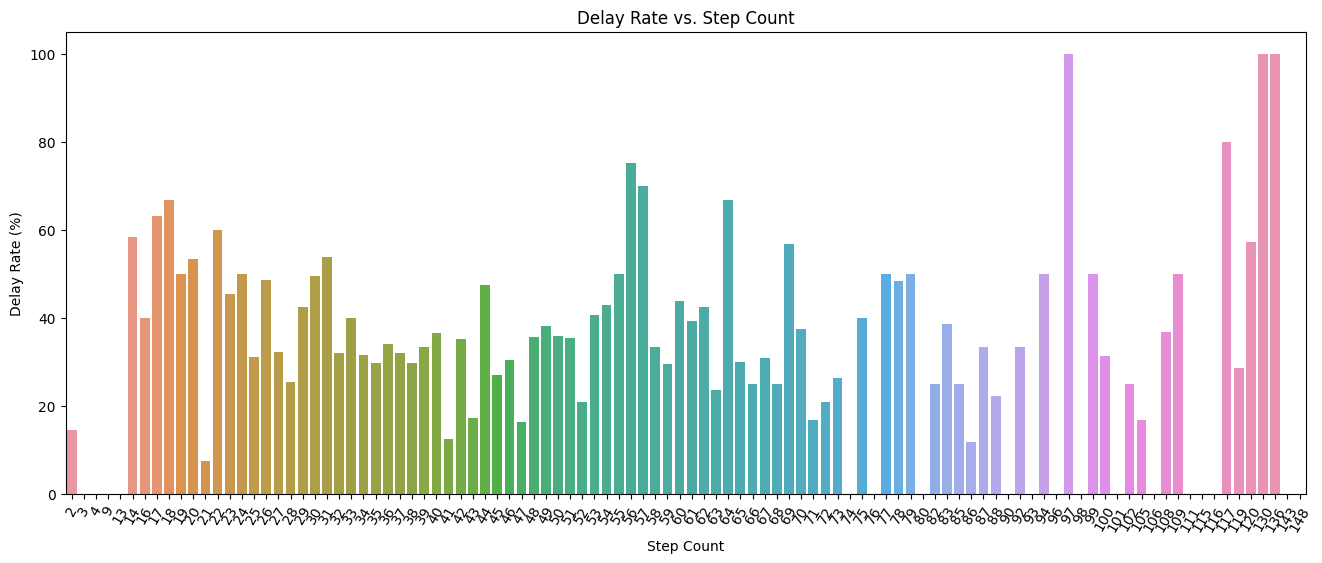

In [31]:
import pandas as pd

# Assuming 'df' is your DataFrame and it has a binary 'is_delayed' column where True indicates a delay
delay_counts = df.groupby('Step_Count')['is_delayed'].sum()  # Sum of delays per step count
total_counts = df.groupby('Step_Count').size()  # Total shipments per step count

# Creating a DataFrame to hold the count of delays and total counts
step_delay_data = pd.DataFrame({
    'Total Shipments': total_counts,
    'Delays': delay_counts,
    'Delay Rate': (delay_counts / total_counts) * 100  # Calculating delay rate as a percentage
})
step_delay_data.reset_index(inplace=True)  # Resetting index to make 'Step_Count' a column


plt.figure(figsize=(16, 6))
#sns.lineplot(x='Step_Count', y='Delay Rate', data=step_delay_data, marker='o')

sns.barplot(x='Step_Count', y='Delay Rate', data=step_delay_data)


plt.title('Delay Rate vs. Step Count')
plt.xlabel('Step Count')
plt.ylabel('Delay Rate (%)')

plt.xticks(rotation=60)  # Rotating the x-labels for better readability


plt.savefig('./results/Step count Vs delay.jpeg')  # Saves the plot

plt.show()



c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\anaconda3\envs\dl\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


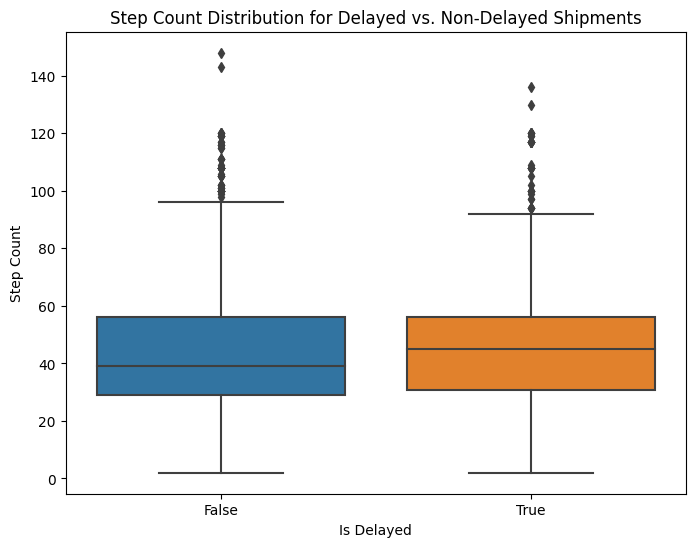

In [30]:
# Box Plot for Step Count by Delay Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_delayed', y='Step_Count', data=df)
plt.title('Step Count Distribution for Delayed vs. Non-Delayed Shipments')
plt.xlabel('Is Delayed')
plt.ylabel('Step Count')
plt.show()

In [52]:

# Group by postcode to count delays
postcode_delays = df.groupby('LAST_DELIVERY_POST_CODE').agg({
    'is_delayed': 'sum',  # Count of delays
    'LAST_DELIVERY_LATITUDE': 'first',
    'LAST_DELIVERY_LONGITUDE': 'first' ,
    'FIRST_COLLECTION_LATITUDE': 'first',
    'FIRST_COLLECTION_LONGITUDE':'first'
}).reset_index()

# Renaming columns for clarity
postcode_delays.rename(columns={'is_delayed': 'Count of Delays'}, inplace=True)


In [53]:
postcode_delays

,LAST_DELIVERY_POST_CODE,Count of Delays,LAST_DELIVERY_LATITUDE,LAST_DELIVERY_LONGITUDE,FIRST_COLLECTION_LATITUDE,FIRST_COLLECTION_LONGITUDE
0,AB10 7AY,0,57.121283,-2.126269,53.324964,-2.758291
1,AB42 1UE,0,57.509400,-1.782527,53.462845,-2.896967
2,AL10 8XF,1,51.741040,-0.218368,51.742307,-0.219644
3,AL10 9TP,0,51.774757,-0.249213,52.507605,-0.693317
4,AL10 9TR,0,51.772167,-0.250353,53.293393,-1.074008
...,...,...,...,...,...,...
428,WS9 0SW,1,52.593326,-1.937572,52.829374,-1.332134
429,WV4 6UD,5,52.560452,-2.099437,53.462845,-2.896967
430,WV5 8AE,1,52.524085,-2.209485,53.771668,-1.514934
431,YO11 3DT,0,54.238562,-0.390816,52.321427,0.924083


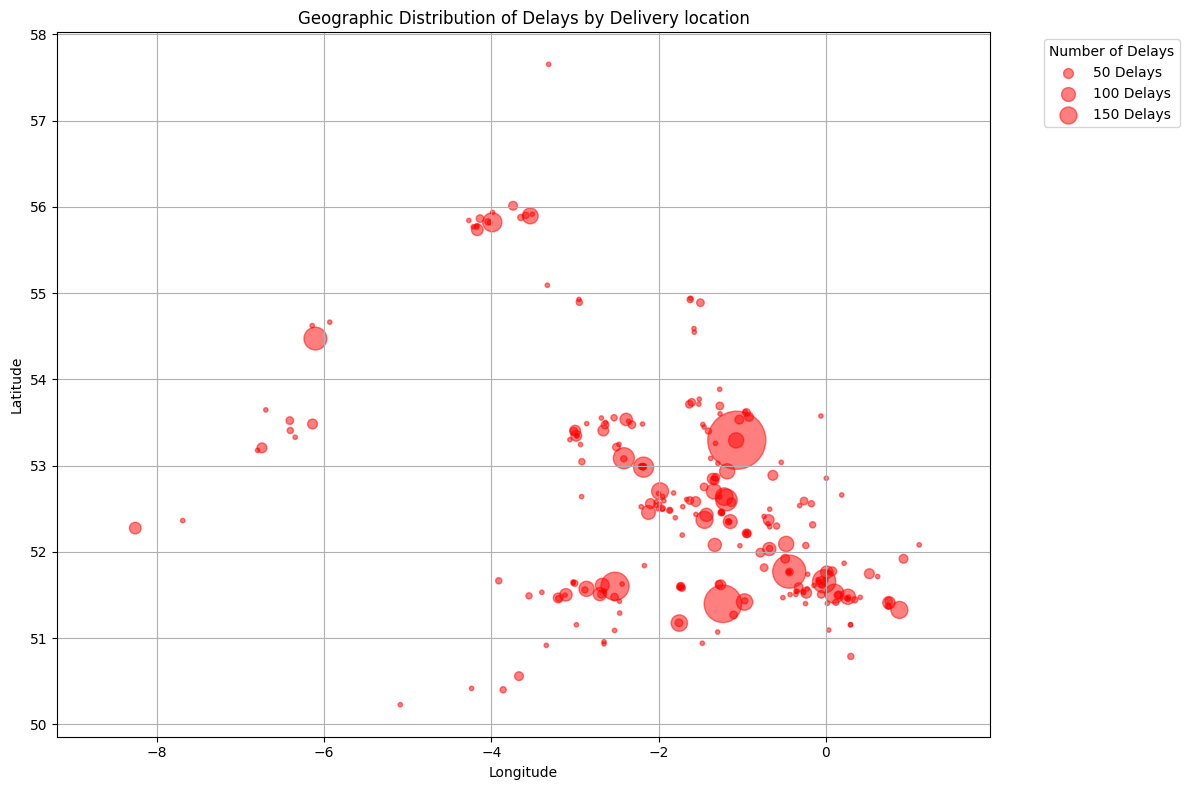

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Sample data setup
plt.figure(figsize=(12, 8))
scatter = plt.scatter(postcode_delays['LAST_DELIVERY_LONGITUDE'], postcode_delays['LAST_DELIVERY_LATITUDE'],
                      s=postcode_delays['Count of Delays'] * 10,  # Size proportional to count of delays
                      alpha=0.5, color='red')
plt.title('Geographic Distribution of Delays by Delivery location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)


# Define legend: sizes and their corresponding labels
sizes = [50, 100, 150]  # Example sizes for the legend
size_labels = ['50 Delays', '100 Delays', '150 Delays']
legend_handles = [plt.scatter([], [], s=size, label=label, color='red', alpha=0.5)
                  for size, label in zip(sizes, size_labels)]

# Create the legend
plt.legend(handles=legend_handles, title="Number of Delays", bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust the layout
plt.tight_layout()

plt.savefig('./results/Loca delivery Vs delay.jpeg')  # Saves the plot

plt.show()


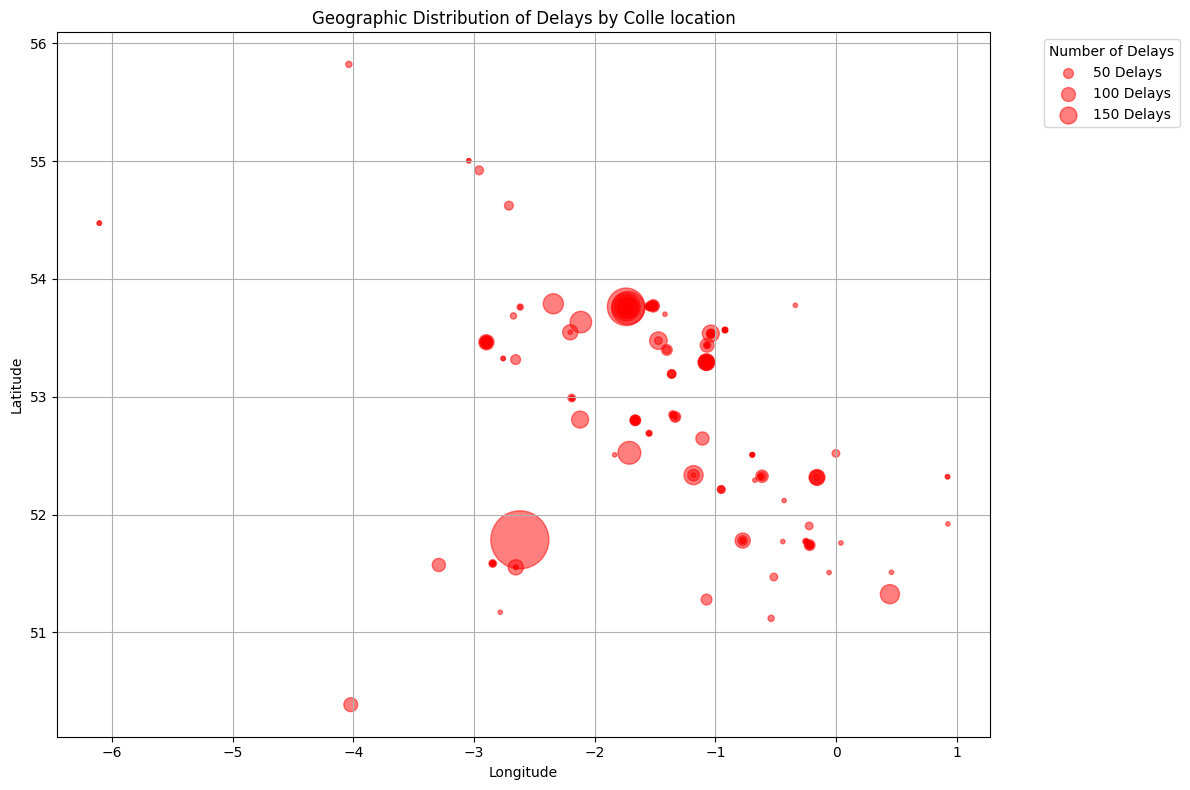

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Sample data setup
# Assume 'postcode_delays' has 'LAST_DELIVERY_LONGITUDE', 'LAST_DELIVERY_LATITUDE', and 'Count of Delays'
plt.figure(figsize=(12, 8))
scatter = plt.scatter(postcode_delays['FIRST_COLLECTION_LONGITUDE'], postcode_delays['FIRST_COLLECTION_LATITUDE'],
                      s=postcode_delays['Count of Delays'] * 10,  # Size proportional to count of delays
                      alpha=0.5, color='red')
plt.title('Geographic Distribution of Delays by Colle location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)


# Define legend: sizes and their corresponding labels
sizes = [50, 100, 150]  # Example sizes for the legend
size_labels = ['50 Delays', '100 Delays', '150 Delays']
legend_handles = [plt.scatter([], [], s=size, label=label, color='red', alpha=0.5)
                  for size, label in zip(sizes, size_labels)]

# Create the legend
plt.legend(handles=legend_handles, title="Number of Delays", bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust the layout
plt.tight_layout()
plt.savefig('./results/Collection loc Vs delay.jpeg')  # Saves the plot

plt.show()
